<pre>
Carilah dataset real, bebas dari internet dengan ketentuan sbb:

jumlah total atribut lebih dari 5
minimal jumlah data adalah 100 data
dapat digunakan untuk pemodelan Regresi
Kemudian, lakukan beberapa hal berikut:

1 tentukan variable dependent dan independent dari dataset
2 lakukan eksplorasi dan visualisasi data
3 lakukan data analisis dan juga pengecekan serta pembersihan data dari outlier dan missing data jika diperlukan
4 lakukan pemodelan regresi (linear dan berganda) dan seleksi fitur dengan korelasi agar mendapatkan atribut (variable independent) yang baik untuk digunakan pada model regresi
5 analisa dan jelaskan hasil evaluasi pemodelan regresi
6 lakukan pemodelan dengan regresi logistik dengan data yang sama dengan cara mentransformasikan variable dependent yang    awalnya
  bernilai continue menjadi categorical (hint: Gunakan Binning Data in Pandas).
  Contoh: variable dependent harga mobil (bernilai continue) ditransformasikan menjadi harga model Mahal dan Murah (untuk 2 kelas)
  dan Mahal, Sedang, Murah (untuk 3 kelas)
7 analisa dan jelaskan hasil evaluasi pemodelan regresi logistik

Ketentuan yang harus dikumpulan adalah sebagai berikut: 
1 Source dalam format file jupiter notebook (.ipynb) lengkap dengan dataset.
2 Pengumpulan source code juga dapat dilakukan melalui git repository (Github/Gitlab) dengan melampirkan link menuju public
  repository pada assigment Berajah.
3 Video presentasi sederhana (tidak perlu banyak edit  seperti tambah efek suara atau animasi, karena video tidak masuk penilaian
  mengenai penjelasan source code dan hasilnya.
4 Durasi video minimal 4 menit dan maksimal 10 menit. Suara video harus terdengar dengan jelas dan menampilkan wajah dari presentasi
  Rekomendasi: Gunakan Aplikasi Zoom Free untuk record video, karena ada 40 Menit record zoom meeting mandiri untuk akun free)
5 Video di upload di kanal Youtube ataupun platform lainnya (Contoh: google drive), kemudian cukup melampirkan link menuju video saja.
6 Batas waktu pengumpulan sebelum 25 April 2021.

# Jawaban Nomor 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#Nama dataframe kita adalah df yang berisi data dari kc_house_data.csv.
#Features yang digunakan adalah 'bedrooms','bathrooms','sqft_living','grade','price' dan 'yr_built'
df = pd.read_csv('kc_house_data.csv', usecols=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'price', 'yr_built'])

In [3]:
#Melihat 5 baris teratas dari data
#Independent variabel(x) adalah bedrooms, bathrooms, sqft_living, grade, yr_built
#Dependent variabel(y) adalah price
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


Variabel Dependent/variabel(y) : price

Variabel Independent/variabel(x) : bedrooms, bathrooms, sqft_living, grade, yr_built

In [4]:
#Mengetahui jumlah kolom dan baris dari data
#Data yang digunakan mempunyai 6 kolom (features) dengan 21613 baris
df.shape

(21613, 6)

In [5]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], dtype='object')

In [6]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
#Dapat dilihat bahwa seluruh data sudah di dalam bentuk numerik
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
price          21613 non-null float64
bedrooms       21613 non-null int64
bathrooms      21613 non-null float64
sqft_living    21613 non-null int64
grade          21613 non-null int64
yr_built       21613 non-null int64
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


In [7]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
df.describe()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000,2015.000000


In [8]:
#Merubah tipe data dari bathrooms yang semula float menjadi int.
df['bathrooms'] = df['bathrooms'].astype('int')
#Mengganti nilai 33 menjadi 3.
df['bedrooms'] = df['bedrooms'].replace(33,3)

In [9]:
#Mencari dan menangani missing values.
#Ternyata datanya sudah tidak ada missing values.
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
dtype: int64

# Jawaban nomor 2
Melakukan eksplorasi data dan visualisasi data

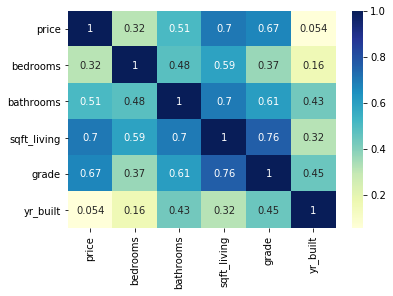

In [10]:
#EKSPLORASI DATA
# Mengetahui nilai korelasi dari independent variable dan dependent variable
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)

Dari tabel korelasi tersebut dapat diketahui bahwa nilai dengan korelasi yang paling baik yaitu:
bathrooms 0.43, sqft_living 0.32, dan kategori grade 0.45

<Figure size 720x1440 with 0 Axes>

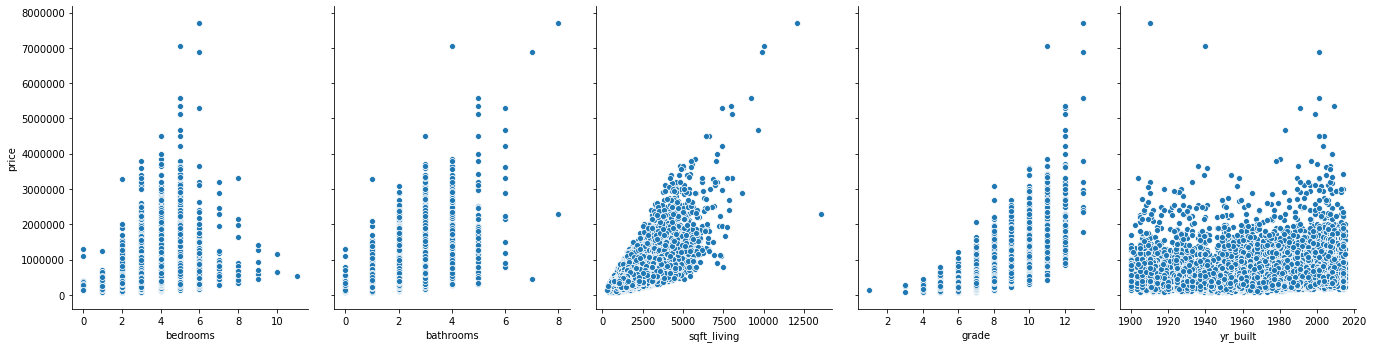

In [12]:
#VISUALISASI DATA
#Bivariate analysis antara independent variable dan dependent variable.

plt.figure(figsize=(10,20))
sns.pairplot(data=df, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], y_vars=['price'], size=5, aspect=0.75)

In [14]:
data = df[["bathrooms", "sqft_living", "grade", "price"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 4 columns):
bathrooms      21613 non-null int32
sqft_living    21613 non-null int64
grade          21613 non-null int64
price          21613 non-null float64
dtypes: float64(1), int32(1), int64(2)
memory usage: 591.1 KB


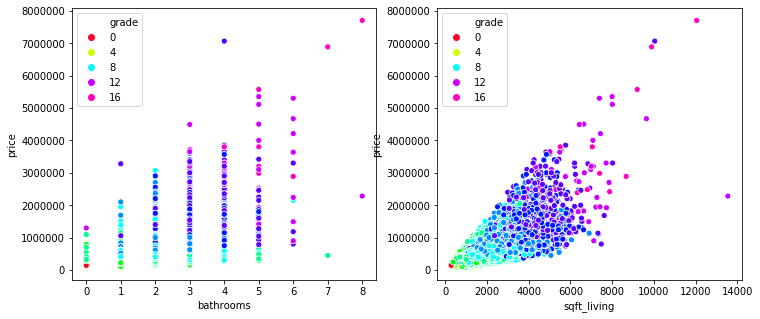

In [37]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(df["bathrooms"],df["price"], hue=df["grade"],palette="gist_rainbow")
plt.subplot(1,2,2)
sns.scatterplot(df["sqft_living"],df["price"], hue=df["grade"], palette="gist_rainbow")

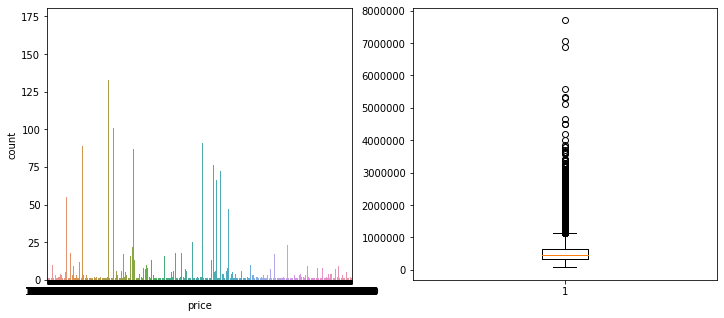

In [15]:
f = plt.figure(figsize=(12,5))
f.add_subplot(1,2,1)
sns.countplot(df['price'])
f.add_subplot(1,2,2)
plt.boxplot(df['price'])
plt.show()

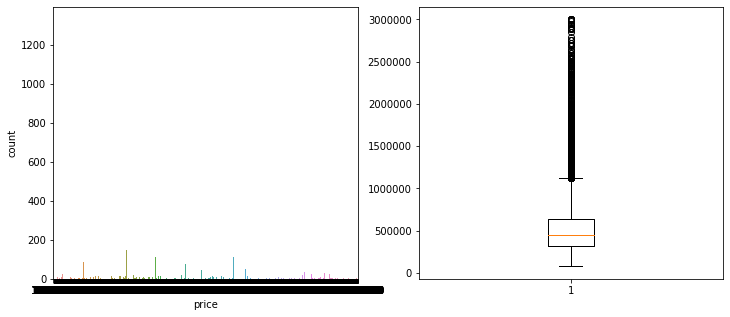

In [17]:
clean_price = data[data["price"]<=3000000]
f = plt.figure(figsize=(12,5))
f.add_subplot(1,2,1)
clean_price['price'].plot(kind='hist', bins=100)
sns.countplot(clean_price['price'])
f.add_subplot(1,2,2)
plt.boxplot(clean_price['price'])
plt.show()

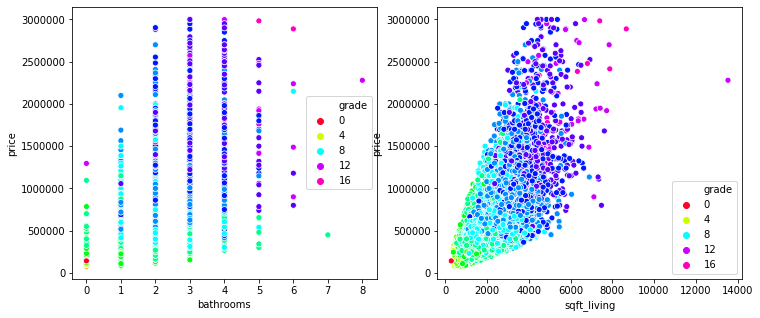

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(clean_price["bathrooms"],clean_price["price"], hue=clean_price["grade"],palette="gist_rainbow")
plt.subplot(1,2,2)
sns.scatterplot(clean_price["sqft_living"],clean_price["price"], hue=clean_price["grade"], palette="gist_rainbow")